# Chapter 1: Introduction to Time Series
- [Different types of data](#p1)
  - Cross-sectional data
  - Time series data
  - Panel data

- [Internal structures of time series](#p2)
  - General trend
  - Seasonality
      - Run sequence plot
      - Seasonal sub series plot
      - Multiple box plots
  - Cyclical changes
  - Unexpected variations

- [Models for time series analysis](#p3)
  - Zero mean models
  - Random walk
  - Trend models
  - Seasonality models

- [Autocorrelation and Partial autocorrelation](#p4)

<a name="p1"></a>
## Different types of data 
### Cross-sectional data
Can comprise of observations taken at different points in time, however, in such cases time itself does not play any significant role in the analysis.

Often, analysis of cross-sectional data starts with a plot of the variables to visualize their statistical properties such as central tendency, dispersion, skewness, and kurtosis.

[World Development Indicators Dataset](https://www.kaggle.com/worldbank/world-development-indicators/discussion/38893)

In [50]:
import pandas as pd

wdi = pd.read_csv('data/WDIData.csv')
print(wdi.columns.values)

['Unnamed: 0' 'Country Name' 'Country Code' 'Indicator Name'
 'Indicator Code' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967'
 '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'
 '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2018' '2019' 'Unnamed: 64']


The following figure illustrates this with the univariate example of military expenditure as a percentage of Gross Domestic Product of 85 countries in the year 2010. 
 
By taking the data from a single year we ensure its cross-sectional nature.

In [51]:
central_govt_debt = wdi.loc[wdi['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = wdi.loc[wdi['Indicator Name']=='Military expenditure (% of GDP)']
central_govt_debt.set_index('Country Code', inplace=True)
military_exp.set_index('Country Code', inplace=True)

data_to_plot = pd.concat((central_govt_debt['2010'], military_exp['2010']), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot = data_to_plot.dropna()
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
ECA,21.490209,2.820027
TEC,21.490209,2.669069
LMC,44.601199,1.951050
NAC,85.464274,4.320812
SAS,52.041592,2.676482


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 85 countries in 2010')

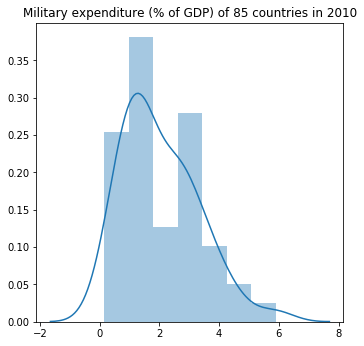

In [52]:
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')

Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2010')

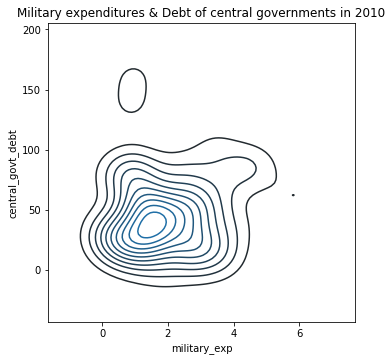

In [53]:
# Explore joint distribution with kernel density plots
# no clear correlation between the two, except may be for lower values
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')

### Time series data

Time series data is typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation, and so on.

Consider one country for a span of 10 years from 2001 to 2010.

In [54]:
central_govt_debt_us = central_govt_debt.loc['USA'].T
military_exp_us = military_exp.loc['USA'].T
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

data_us.dropna(inplace=True)
data_us.shape

(22, 2)

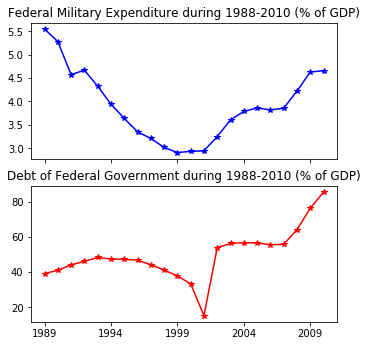

In [55]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

<a name="p2"></a>
## Internal structures of time series

<a name="p3"></a>
## Models for time series analysis

<a name="p4"></a>
## Autocorrelation and Partial autocorrelation